In [1]:
# Simple SVM implementation for IRIS dataset
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1, stratify   = y)

In [6]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric= "minkowski")

In [8]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn.predict(X_test_std)

In [11]:
print("Misclassified samples %d" % (y_test - y_pred).sum())

Misclassified samples 0


In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy %.2f" % (accuracy_score(y_test, y_pred)* 100))

Accuracy 100.00


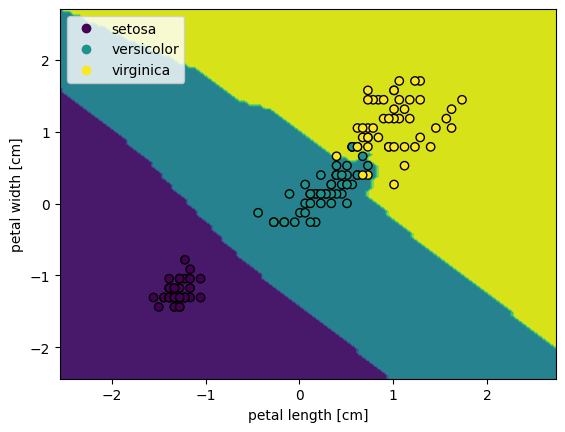

In [13]:
# Plot decision regions
from sklearn.inspection import DecisionBoundaryDisplay
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
disp = DecisionBoundaryDisplay.from_estimator(
    knn,
    X_combined,
    response_method="predict",
)

scatter = disp.ax_.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, edgecolor="k")
plt.xlabel("petal length [cm]")
plt.ylabel("petal width [cm]")
handles, labels = scatter.legend_elements()  # Automatically creates handles for scatter points
plt.legend(handles, iris.target_names, loc='upper left') 
plt.show()